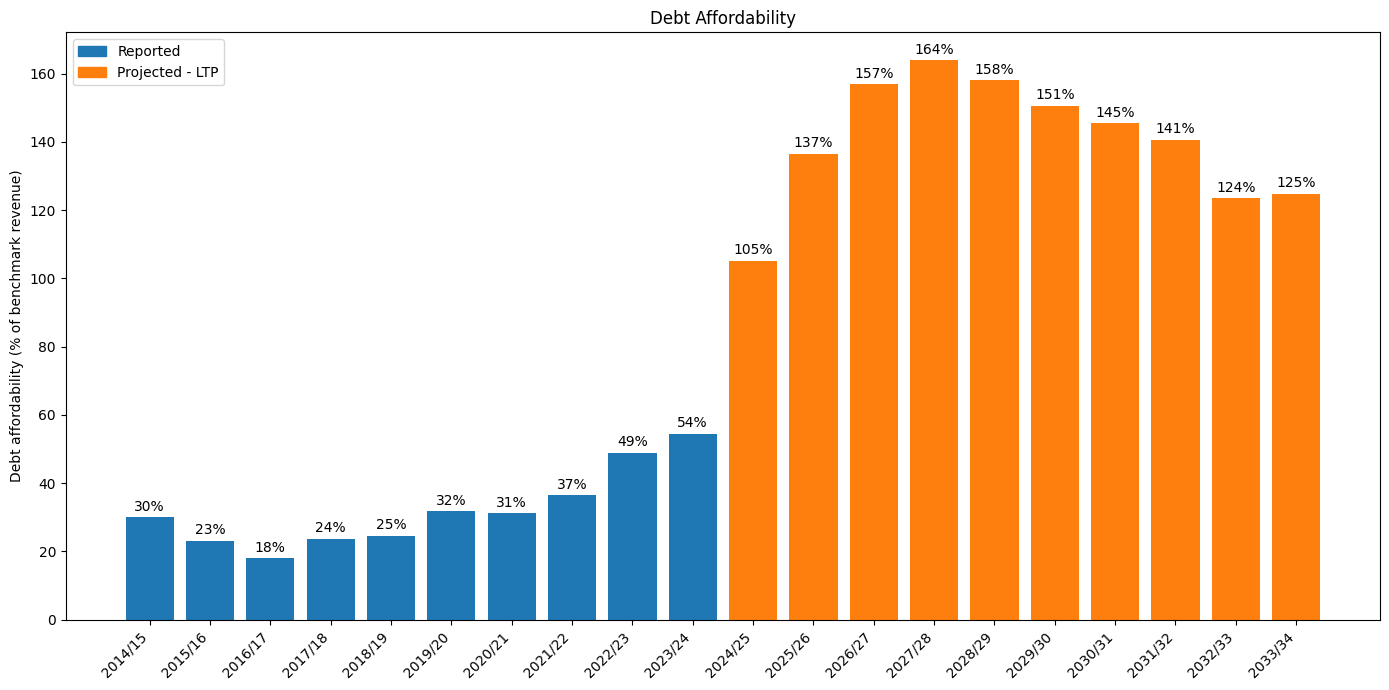

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Data with corrected label
raw = [
    ("2033/34", "124.79%"),
    ("2032/33", "123.51%"),
    ("2031/32", "140.64%"),
    ("2030/31", "145.46%"),
    ("2029/30", "150.61%"),
    ("2028/29", "158.16%"),
    ("2027/28", "163.93%"),
    ("2026/27", "156.99%"),
    ("2025/26", "136.54%"),
    ("2024/25", "105.24%"),
    ("2023/24", "54.48%"),
    ("2022/23", "48.91%"),
    ("2021/22", "36.55%"),
    ("2020/21", "31.20%"),
    ("2019/20", "31.76%"),
    ("2018/19", "24.61%"),
    ("2017/18", "23.69%"),
    ("2016/17", "18.04%"),
    ("2015/16", "23.10%"),
    ("2014/15", "30.01%"),
]


# Handle duplicate labels (2023/24 appears twice)
label_counts = {}
entries = []
for year, pct in raw:
    count = label_counts.get(year, 0)
    label_counts[year] = count + 1
    label = year if count == 0 else f"{year} ({chr(96+count+1)})"
    entries.append((label, float(pct.strip('%'))))

df = pd.DataFrame(entries, columns=["Year", "Debt_Affordability_pct"])

# Build a separate sort key column
def sort_key(lbl: str):
    m = re.match(r"^(\d{4})/(\d{2})", lbl)
    first = int(m.group(1)) if m else 0
    suffix_rank = 0
    if " (b)" in lbl:
        suffix_rank = 1
    elif " (c)" in lbl:
        suffix_rank = 2
    return (first, suffix_rank)

df["sort_key"] = df["Year"].map(sort_key)
df = df.sort_values(by="sort_key").drop(columns=["sort_key"]).reset_index(drop=True)

# Colors: blue for reported (≤2023/24), orange for projected (>2023/24)
def is_projected(lbl: str) -> bool:
    m = re.match(r"^(\d{4})/(\d{2})", lbl)
    return int(m.group(1)) >= 2024 if m else False

colors = ["tab:orange" if is_projected(lbl) else "tab:blue" for lbl in df["Year"]]

# Plot vertical bars
plt.figure(figsize=(14, 7))
x_pos = range(len(df))
plt.bar(x_pos, df["Debt_Affordability_pct"], color=colors)
plt.xticks(x_pos, df["Year"], rotation=45, ha='right')
plt.ylabel("Debt affordability (% of benchmark revenue)")
plt.title("Debt Affordability")

# Annotate values
for i, v in enumerate(df["Debt_Affordability_pct"]):
    plt.text(i, v + 1, f"{v:.0f}%", ha='center', va='bottom')

# Legend
import matplotlib.patches as mpatches
reported_patch = mpatches.Patch(color="tab:blue", label="Reported")
projected_patch = mpatches.Patch(color="tab:orange", label="Projected - LTP")
plt.legend(handles=[reported_patch, projected_patch], loc="upper left")

plt.tight_layout()
out_path = "/mnt/data/debt_affordability_bars_vertical_chrono_drop2013-14.png"
# plt.savefig(out_path, dpi=200, bbox_inches="tight")
plt.show()




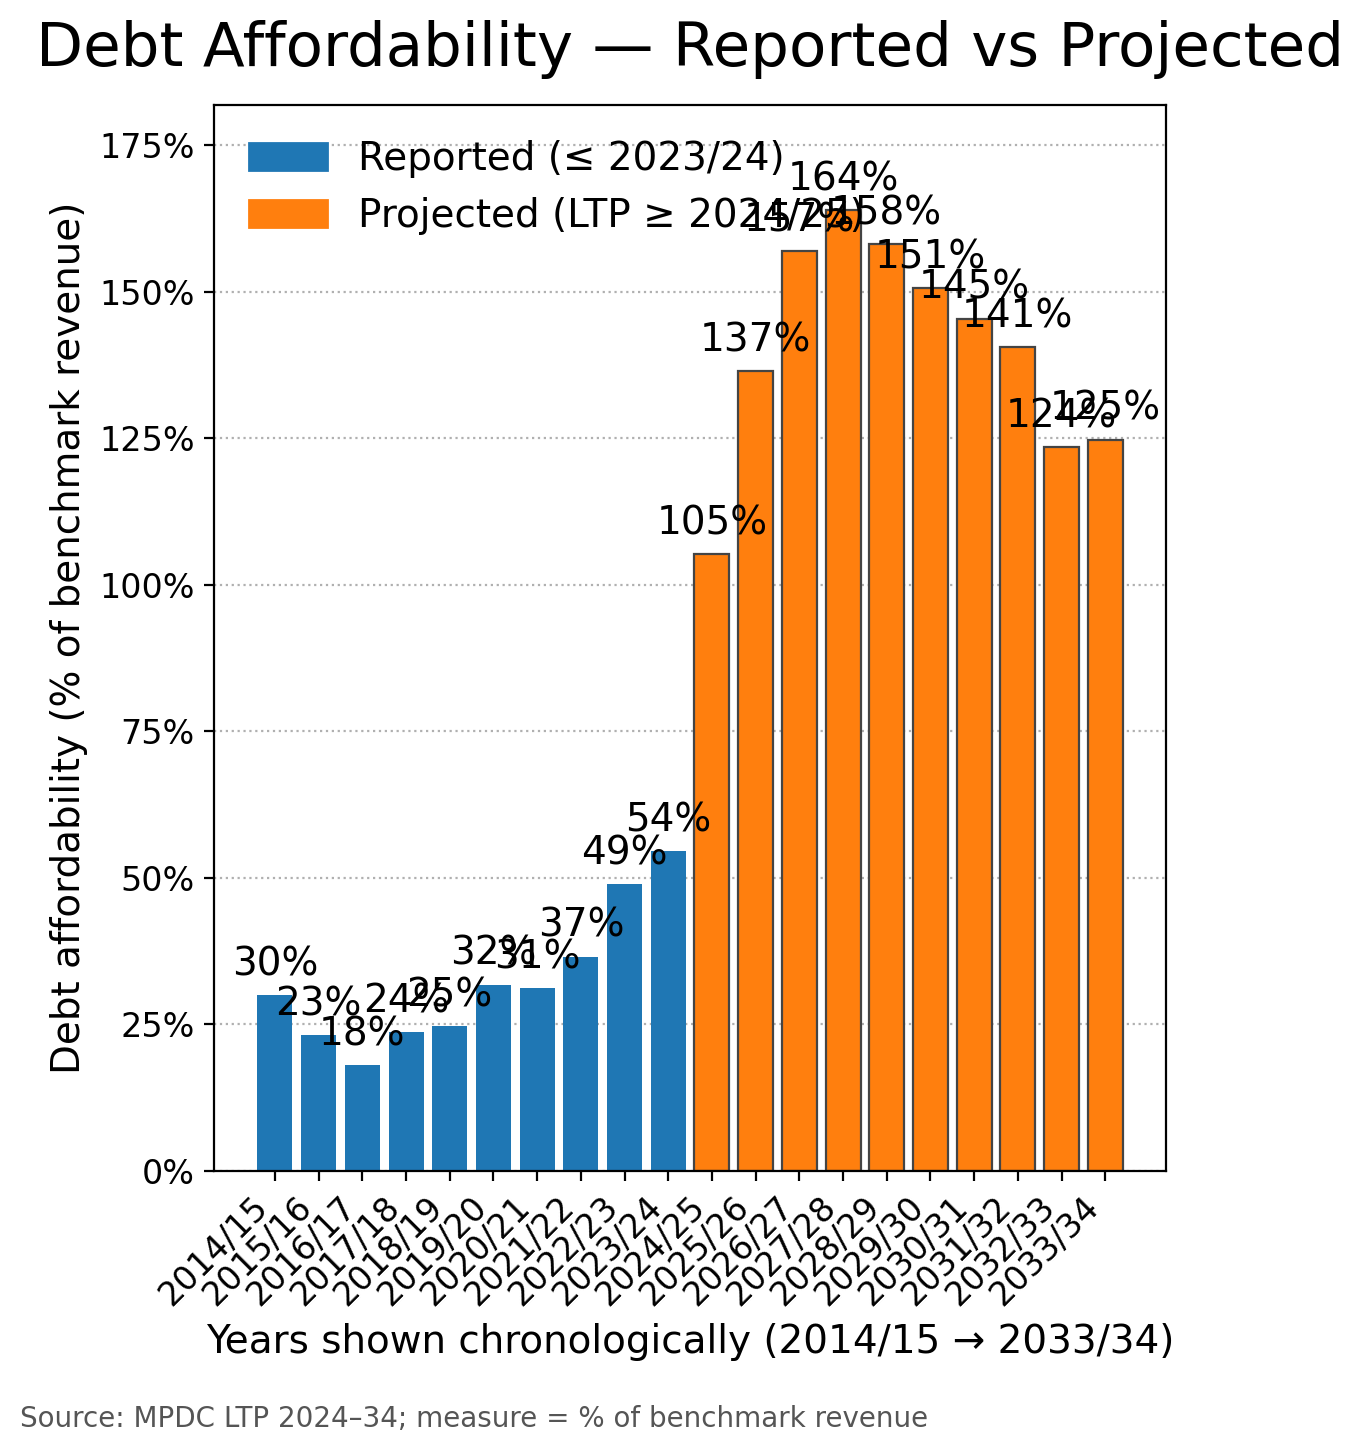

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import pandas as pd
import re

# --- data prep (unchanged) ---
raw = [
    ("2033/34", "124.79%"),
    ("2032/33", "123.51%"),
    ("2031/32", "140.64%"),
    ("2030/31", "145.46%"),
    ("2029/30", "150.61%"),
    ("2028/29", "158.16%"),
    ("2027/28", "163.93%"),
    ("2026/27", "156.99%"),
    ("2025/26", "136.54%"),
    ("2024/25", "105.24%"),
    ("2023/24", "54.48%"),
    ("2022/23", "48.91%"),
    ("2021/22", "36.55%"),
    ("2020/21", "31.20%"),
    ("2019/20", "31.76%"),
    ("2018/19", "24.61%"),
    ("2017/18", "23.69%"),
    ("2016/17", "18.04%"),
    ("2015/16", "23.10%"),
    ("2014/15", "30.01%"),
]

label_counts = {}
entries = []
for year, pct in raw:
    count = label_counts.get(year, 0)
    label_counts[year] = count + 1
    label = year if count == 0 else f"{year} ({chr(96+count+1)})"
    entries.append((label, float(pct.strip('%'))))

df = pd.DataFrame(entries, columns=["Year", "Debt_Affordability_pct"])

def sort_key(lbl: str):
    m = re.match(r"^(\d{4})/(\d{2})", lbl)
    first = int(m.group(1)) if m else 0
    suffix_rank = 0
    if " (b)" in lbl:
        suffix_rank = 1
    elif " (c)" in lbl:
        suffix_rank = 2
    return (first, suffix_rank)

df["sort_key"] = df["Year"].map(sort_key)
df = df.sort_values(by="sort_key").drop(columns=["sort_key"]).reset_index(drop=True)

def is_projected(lbl: str) -> bool:
    m = re.match(r"^(\d{4})/(\d{2})", lbl)
    return int(m.group(1)) >= 2024 if m else False

colors = ["tab:orange" if is_projected(lbl) else "tab:blue" for lbl in df["Year"]]

# --- plotting tweaks for FB ---
# 4:5 aspect at 200 dpi -> 1200x1500 px
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 22,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

fig = plt.figure(figsize=(6, 7.5), dpi=200)  # 1200x1500 px
ax = fig.add_subplot(111)

x_pos = range(len(df))
bars = ax.bar(x_pos, df["Debt_Affordability_pct"], color=colors)

# labels & grid
ax.set_xticks(list(x_pos))
ax.set_xticklabels(df["Year"], rotation=45, ha='right')
ax.set_ylabel("Debt affordability (% of benchmark revenue)")
ax.set_title("Debt Affordability — Reported vs Projected", pad=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.yaxis.grid(True, linestyle=":", linewidth=0.8)
ax.set_axisbelow(True)

# headroom for labels
ymax = df["Debt_Affordability_pct"].max()
ax.set_ylim(0, ymax + 18)

# annotate values as whole percentages
for i, v in enumerate(df["Debt_Affordability_pct"]):
    ax.text(i, v + 2.0, f"{v:.0f}%", ha='center', va='bottom')

# subtle emphasis: put a thin edge on projected bars
for i, (lbl, bar) in enumerate(zip(df["Year"], bars)):
    if is_projected(lbl):
        bar.set_linewidth(0.8)
        bar.set_edgecolor("#444444")

# legend
reported_patch = mpatches.Patch(color="tab:blue", label="Reported (≤ 2023/24)")
projected_patch = mpatches.Patch(color="tab:orange", label="Projected (LTP ≥ 2024/25)")
ax.legend(handles=[reported_patch, projected_patch], loc="upper left", frameon=False)

# subtitle + source footer
ax.set_xlabel("Years shown chronologically (2014/15 → 2033/34)")
plt.figtext(0.01, 0.01, "Source: MPDC LTP 2024–34; measure = % of benchmark revenue",
            ha="left", va="bottom", fontsize=10, color="#555555")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Save for FB upload (turn on when ready)
# out_path = "/mnt/data/debt_affordability_fb_4x5.png"
# plt.savefig(out_path, dpi=200, bbox_inches="tight")
plt.show()


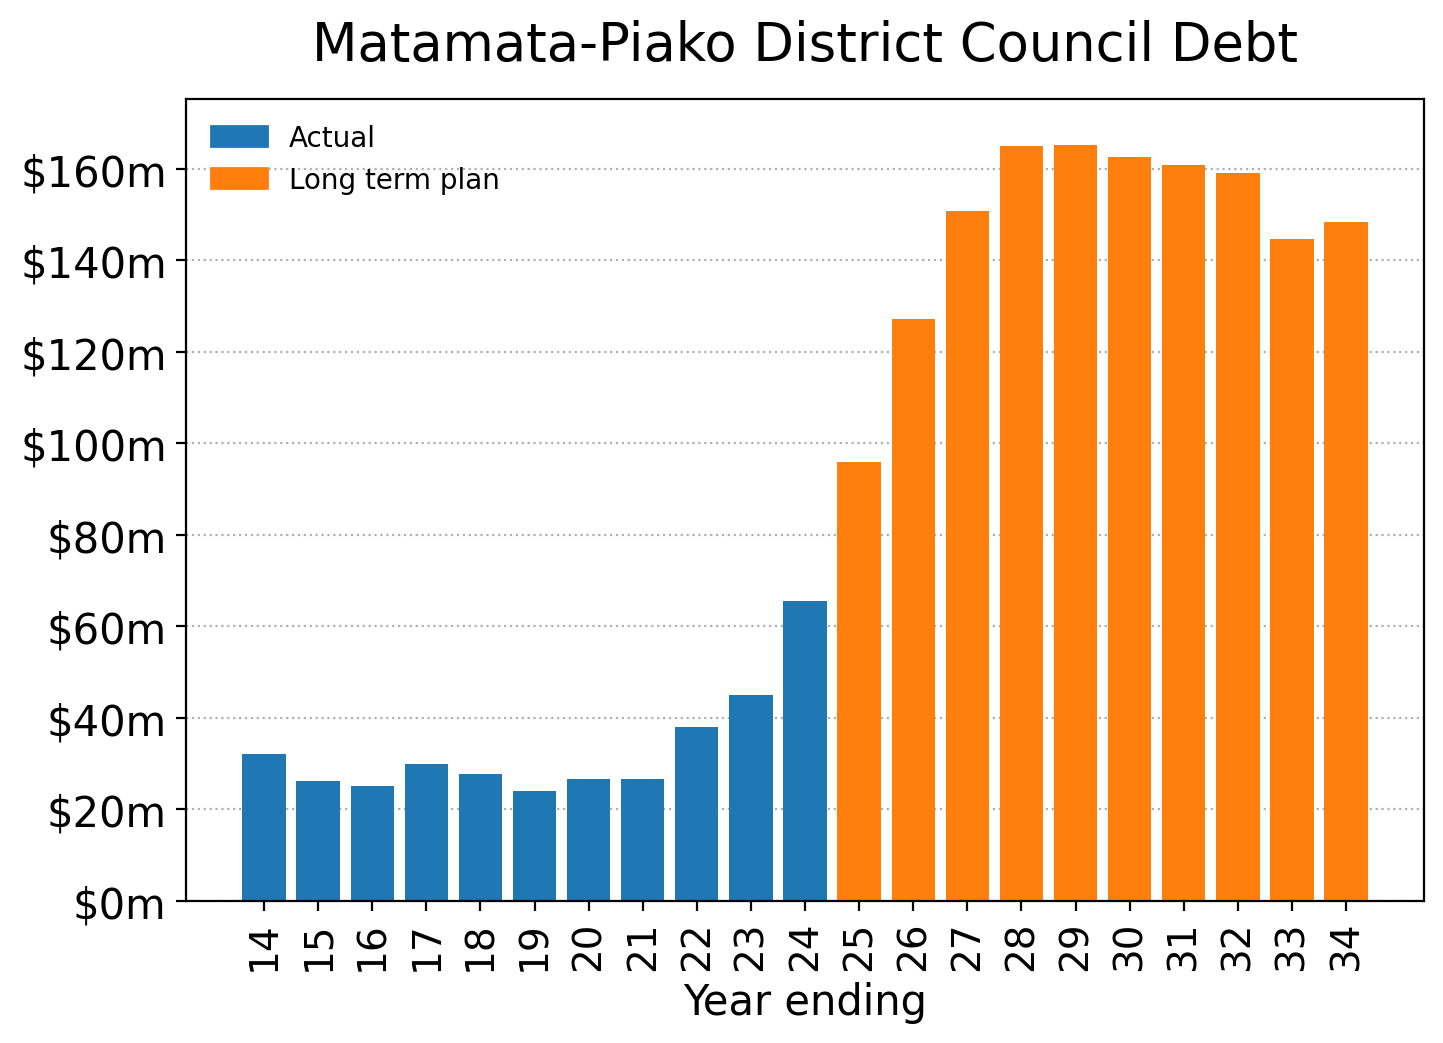

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches

# --- full dataset (total borrowings) ---
raw = [
    ("2033/34", 148.315),
    ("2032/33", 144.776),
    ("2031/32", 159.062),
    ("2030/31", 160.794),
    ("2029/30", 162.528),
    ("2028/29", 165.317),
    ("2027/28", 165.036),
    ("2026/27", 150.847),
    ("2025/26", 127.178),
    ("2024/25", 95.986),
    ("2023/24", 65.500),
    ("2022/23", 45.000),
    ("2021/22", 38.000),
    ("2020/21", 26.500),
    ("2019/20", 26.500),
    ("2018/19", 24.000),
    ("2017/18", 27.616),
    ("2016/17", 29.807),
    ("2015/16", 24.987),
    ("2014/15", 26.137),
    ("2013/14", 32.114),
]


df = pd.DataFrame(raw, columns=["Year", "Debt_m"])

# Sort chronologically by first part of year (2013 → 2033)
def sort_key(lbl: str):
    m = re.match(r"^(\d{4})/(\d{2})", lbl)
    return int(m.group(1)) if m else 0

df["sort_key"] = df["Year"].map(sort_key)
df = df.sort_values("sort_key").drop(columns=["sort_key"]).reset_index(drop=True)

# X labels = just last two digits of the second year (e.g. "2024/25" → "25")
df["YearShort"] = df["Year"].str[-2:]

# Colours: actual (≤2023/24) vs projected (>2023/24)
def is_projected(lbl: str) -> bool:
    m = re.match(r"^(\d{4})/(\d{2})", lbl)
    return int(m.group(1)) >= 2024 if m else False

colors = ["tab:orange" if is_projected(lbl) else "tab:blue" for lbl in df["Year"]]
# --- plotting (Facebook-friendly 4:5 aspect) ---
plt.rcParams.update({
    "font.size": 16,
    "axes.titlesize": 22,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
})

fig, ax = plt.subplots(figsize=(7.5, 5.5), dpi=200)  # 1500x1100 px approx


x = range(len(df))
bars = ax.bar(x, df["Debt_m"], color=colors)

# X ticks = YearShort
ax.set_xticks(list(x))
ax.set_xticklabels(df["YearShort"], rotation=90,fontsize=14, ha='center')
ax.set_xlabel("Year ending", fontsize=15)
# ax.set_ylabel("Total Council Debt")
ax.set_title("Matamata-Piako District Council Debt", pad=14, fontsize=19)


# Y axis in $m
formatter = FuncFormatter(lambda val, _: f"${int(val):,}m")
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.grid(True, linestyle=":", linewidth=0.8)
ax.set_axisbelow(True)
ax.tick_params(axis="y", labelsize=15)


# Headroom for labels
ymax = df["Debt_m"].max()
ax.set_ylim(0, ymax + 10)

# # Bar labels (just numbers)
# for i, v in enumerate(df["Debt_m"]):
#     # ax.text(i, v + 2, f"{v:.0f}", ha="center", va="bottom", fontsize=10)

#     ax.text(i, v + 2, f"{v:.0f}", ha="center", va="bottom", fontsize=5, rotation=0)




# Legend
reported_patch = mpatches.Patch(color="tab:blue", label="Actual")
projected_patch = mpatches.Patch(color="tab:orange", label="Long term plan")
ax.legend(
    handles=[reported_patch, projected_patch],
    loc="upper left",
    frameon=False,
    fontsize=10   # 👈 adjust size here
)
plt.tight_layout()

plt.savefig('council borrowings.png')
plt.show()




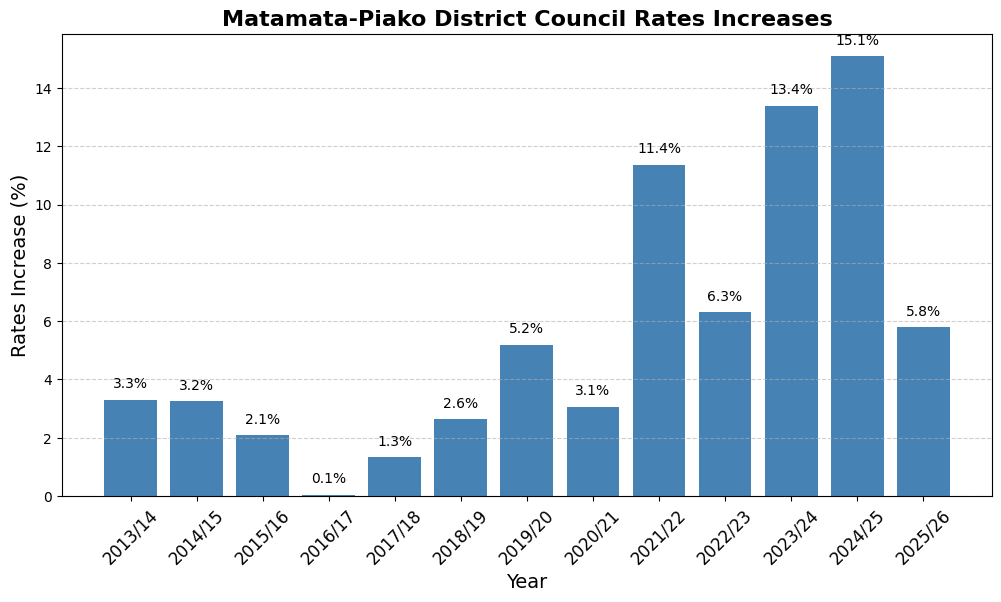

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Rates increases data
rates_data = {
    "Year": [
        "2013/14","2014/15","2015/16","2016/17","2017/18","2018/19","2019/20","2020/21",
        "2021/22","2022/23","2023/24","2024/25","2025/26"
    ],
    "Increase": [
        3.30,3.25,2.08,0.05,1.33,2.63,5.20,3.06,11.37,6.30,13.40,15.10,5.80
    ]
}

df_rates = pd.DataFrame(rates_data)

# Bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(df_rates["Year"], df_rates["Increase"], color="steelblue")

# Add horizontal labels (rounded to 1 decimal place)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, height + 0.3,
        f"{height:.1f}%", ha='center', va='bottom', fontsize=10
    )

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Rates Increase (%)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.title("Matamata-Piako District Council Rates Increases", fontsize=16, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()